In [1]:
import pandas as pd

import time_tech_aggregation as tta
import seaborn as sns
import matplotlib.pyplot as plt
from mplfonts import use_font

In [2]:
use_font('Songti SC')

In [3]:
first_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/2050_GH2_T.xlsx'
second_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/2050_GH2N_T.xlsx'
marginal_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/timeslicecheckandmarginal.xlsx'
cref_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx'
cref_path = '/Users/zhixuan/Desktop/temp/color_index_simplified.xlsx'

data = tta.Data(first_path, second_path, marginal_path, cref_path=cref_path, pref_path='/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/Province_SubProvince.xlsx', province='Heilongjiang')

In [4]:
data.dataframe['技术'][:-5]

0        AEElectrolyzer
1        AEElectrolyzer
2        AEElectrolyzer
3        AEElectrolyzer
4        AEElectrolyzer
              ...      
30014        H2StorageC
30015        H2StorageC
30016        H2StorageC
30017        H2StorageC
30018        H2StorageC
Name: 技术, Length: 4603, dtype: object

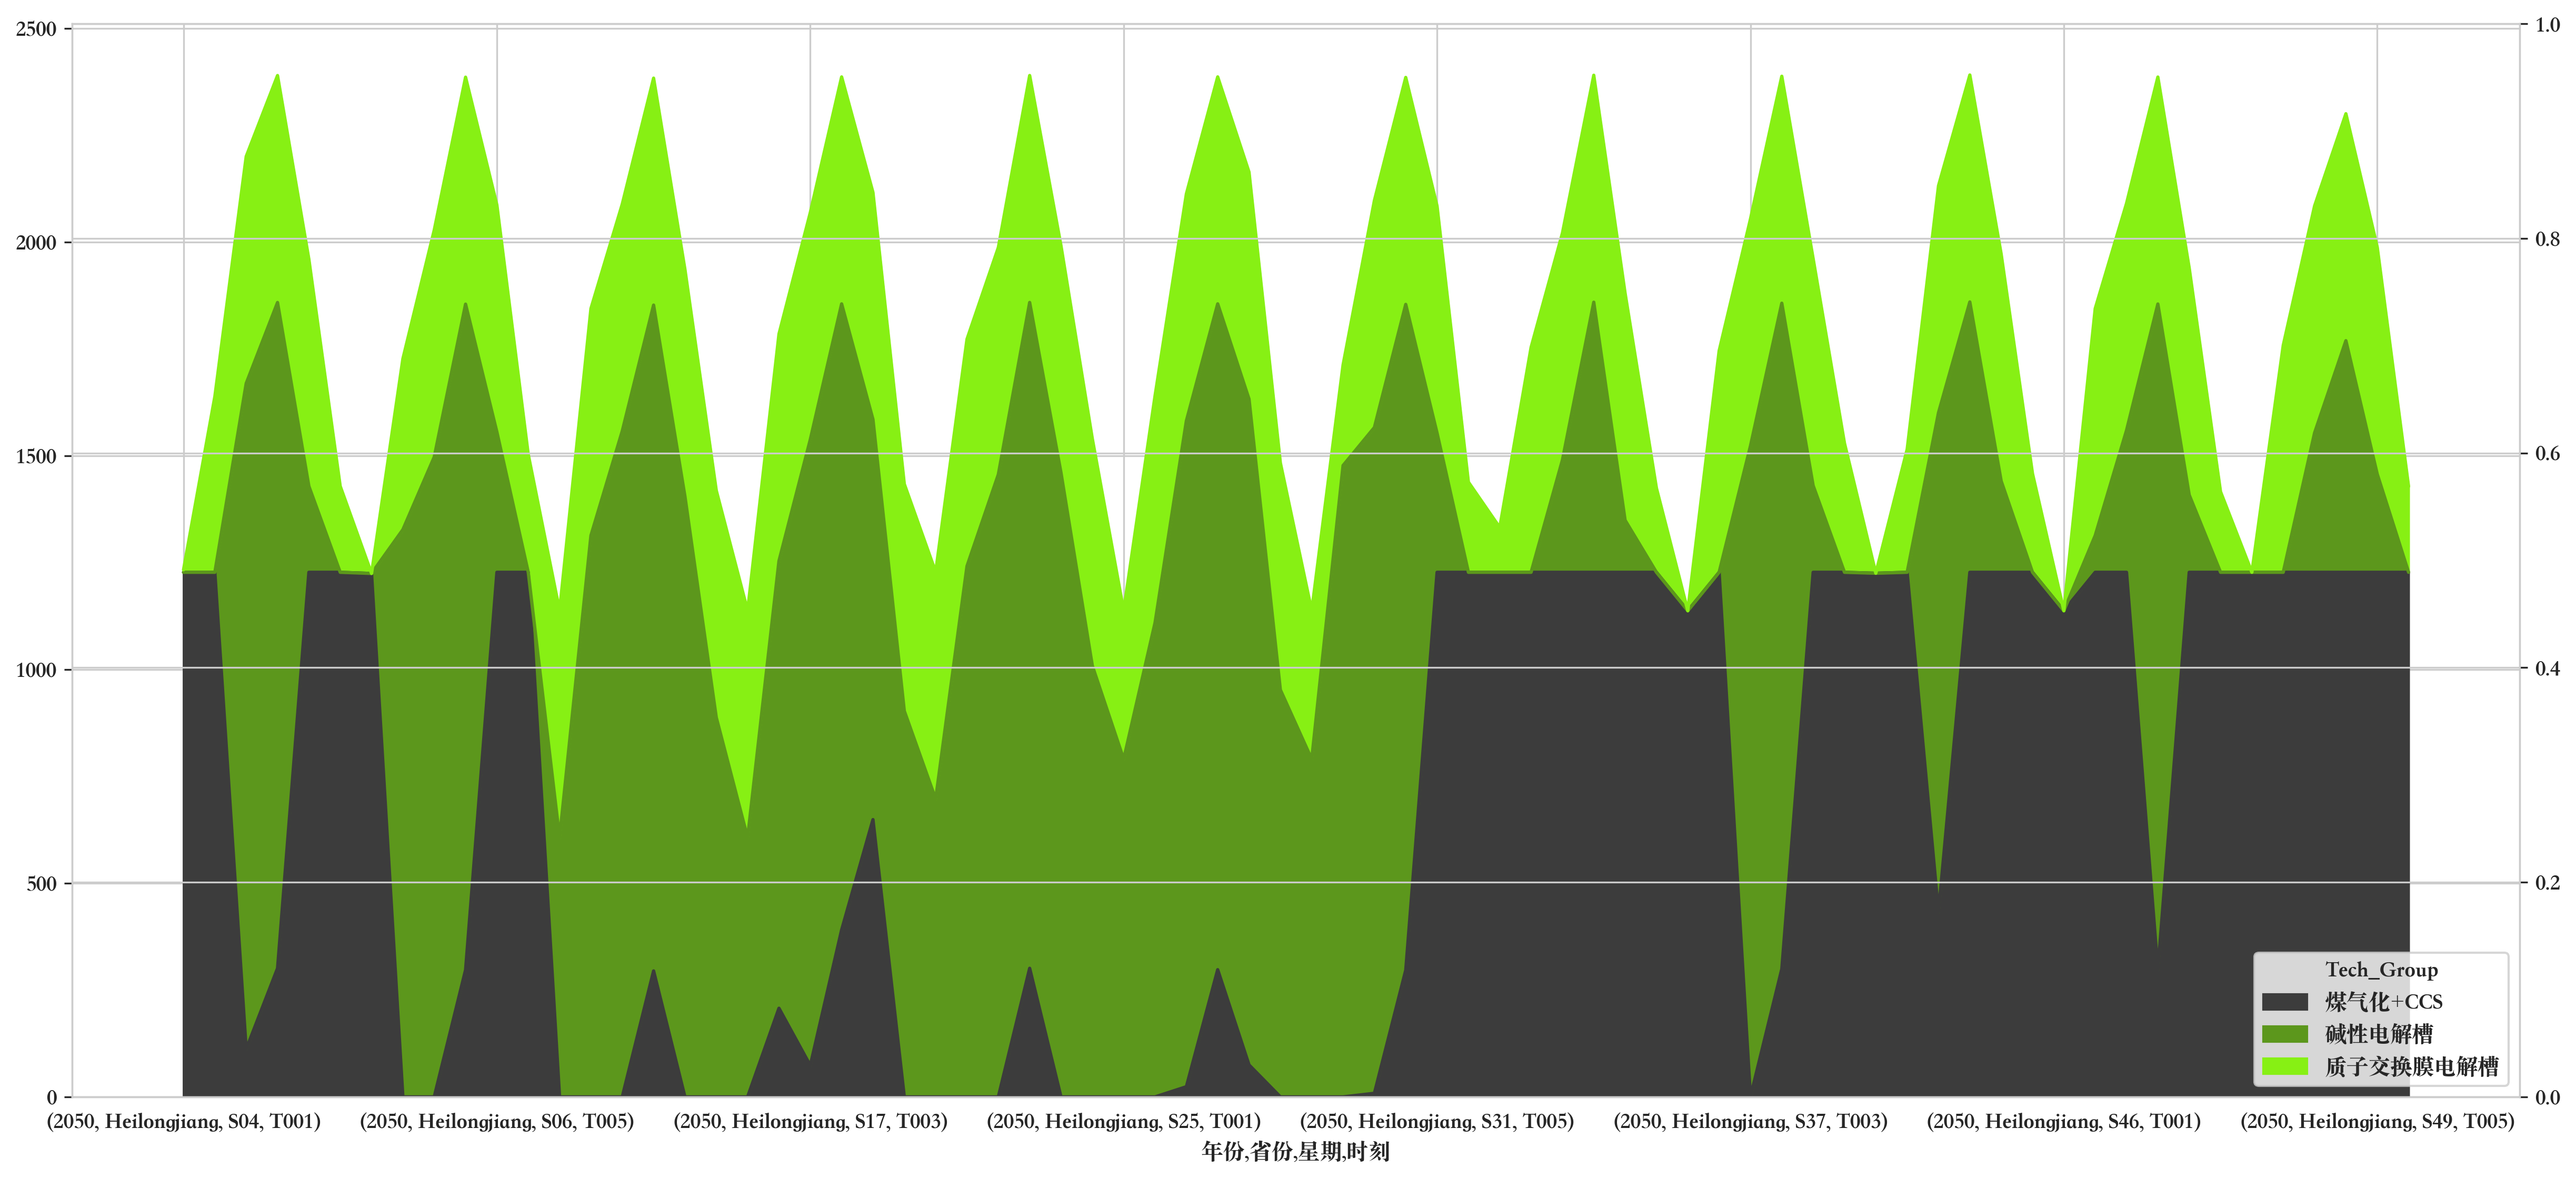

In [5]:
data.stack_plot()

In [6]:
data.dataframe

,年份,省份,技术,星期,时刻,Level,Tech_Group
0,2050,Heilongjiang,AEElectrolyzer,S04,T001,0.000000,碱性电解槽
1,2050,Heilongjiang,AEElectrolyzer,S04,T002,0.000000,碱性电解槽
2,2050,Heilongjiang,AEElectrolyzer,S04,T003,92.510923,碱性电解槽
3,2050,Heilongjiang,AEElectrolyzer,S04,T004,92.510923,碱性电解槽
4,2050,Heilongjiang,AEElectrolyzer,S04,T005,0.000000,碱性电解槽
...,...,...,...,...,...,...,...
30019,2050,Heilongjiang,H2StorageC,S49,T002,0.000000,其他
30020,2050,Heilongjiang,H2StorageC,S49,T003,0.000000,其他
30021,2050,Heilongjiang,H2StorageC,S49,T004,0.000000,其他
30022,2050,Heilongjiang,H2StorageC,S49,T005,0.000000,其他


In [7]:
data.aggregated_dataframe.reset_index().set_index(['星期', '时刻'])

Tech_Group    年份            省份      煤气化+CCS        碱性电解槽    质子交换膜电解槽
星期  时刻                                                              
S04 T001    2050  Heilongjiang  1227.270539     0.000000    5.886618
    T002    2050  Heilongjiang  1227.270539     0.000000  411.486057
    T003    2050  Heilongjiang   111.430640  1557.728852  530.994416
    T004    2050  Heilongjiang   300.759874  1557.728852  530.994416
    T005    2050  Heilongjiang  1227.270539   201.440976  530.994416
...          ...           ...          ...          ...         ...
S49 T002    2050  Heilongjiang  1227.270539     0.000000  530.994416
    T003    2050  Heilongjiang  1227.270539   326.004725  530.994416
    T004    2050  Heilongjiang  1227.270539   541.874943  530.994416
    T005    2050  Heilongjiang  1227.270539   229.767717  530.994416
    T006    2050  Heilongjiang  1227.270539     0.000000  200.939744

[72 rows x 5 columns]

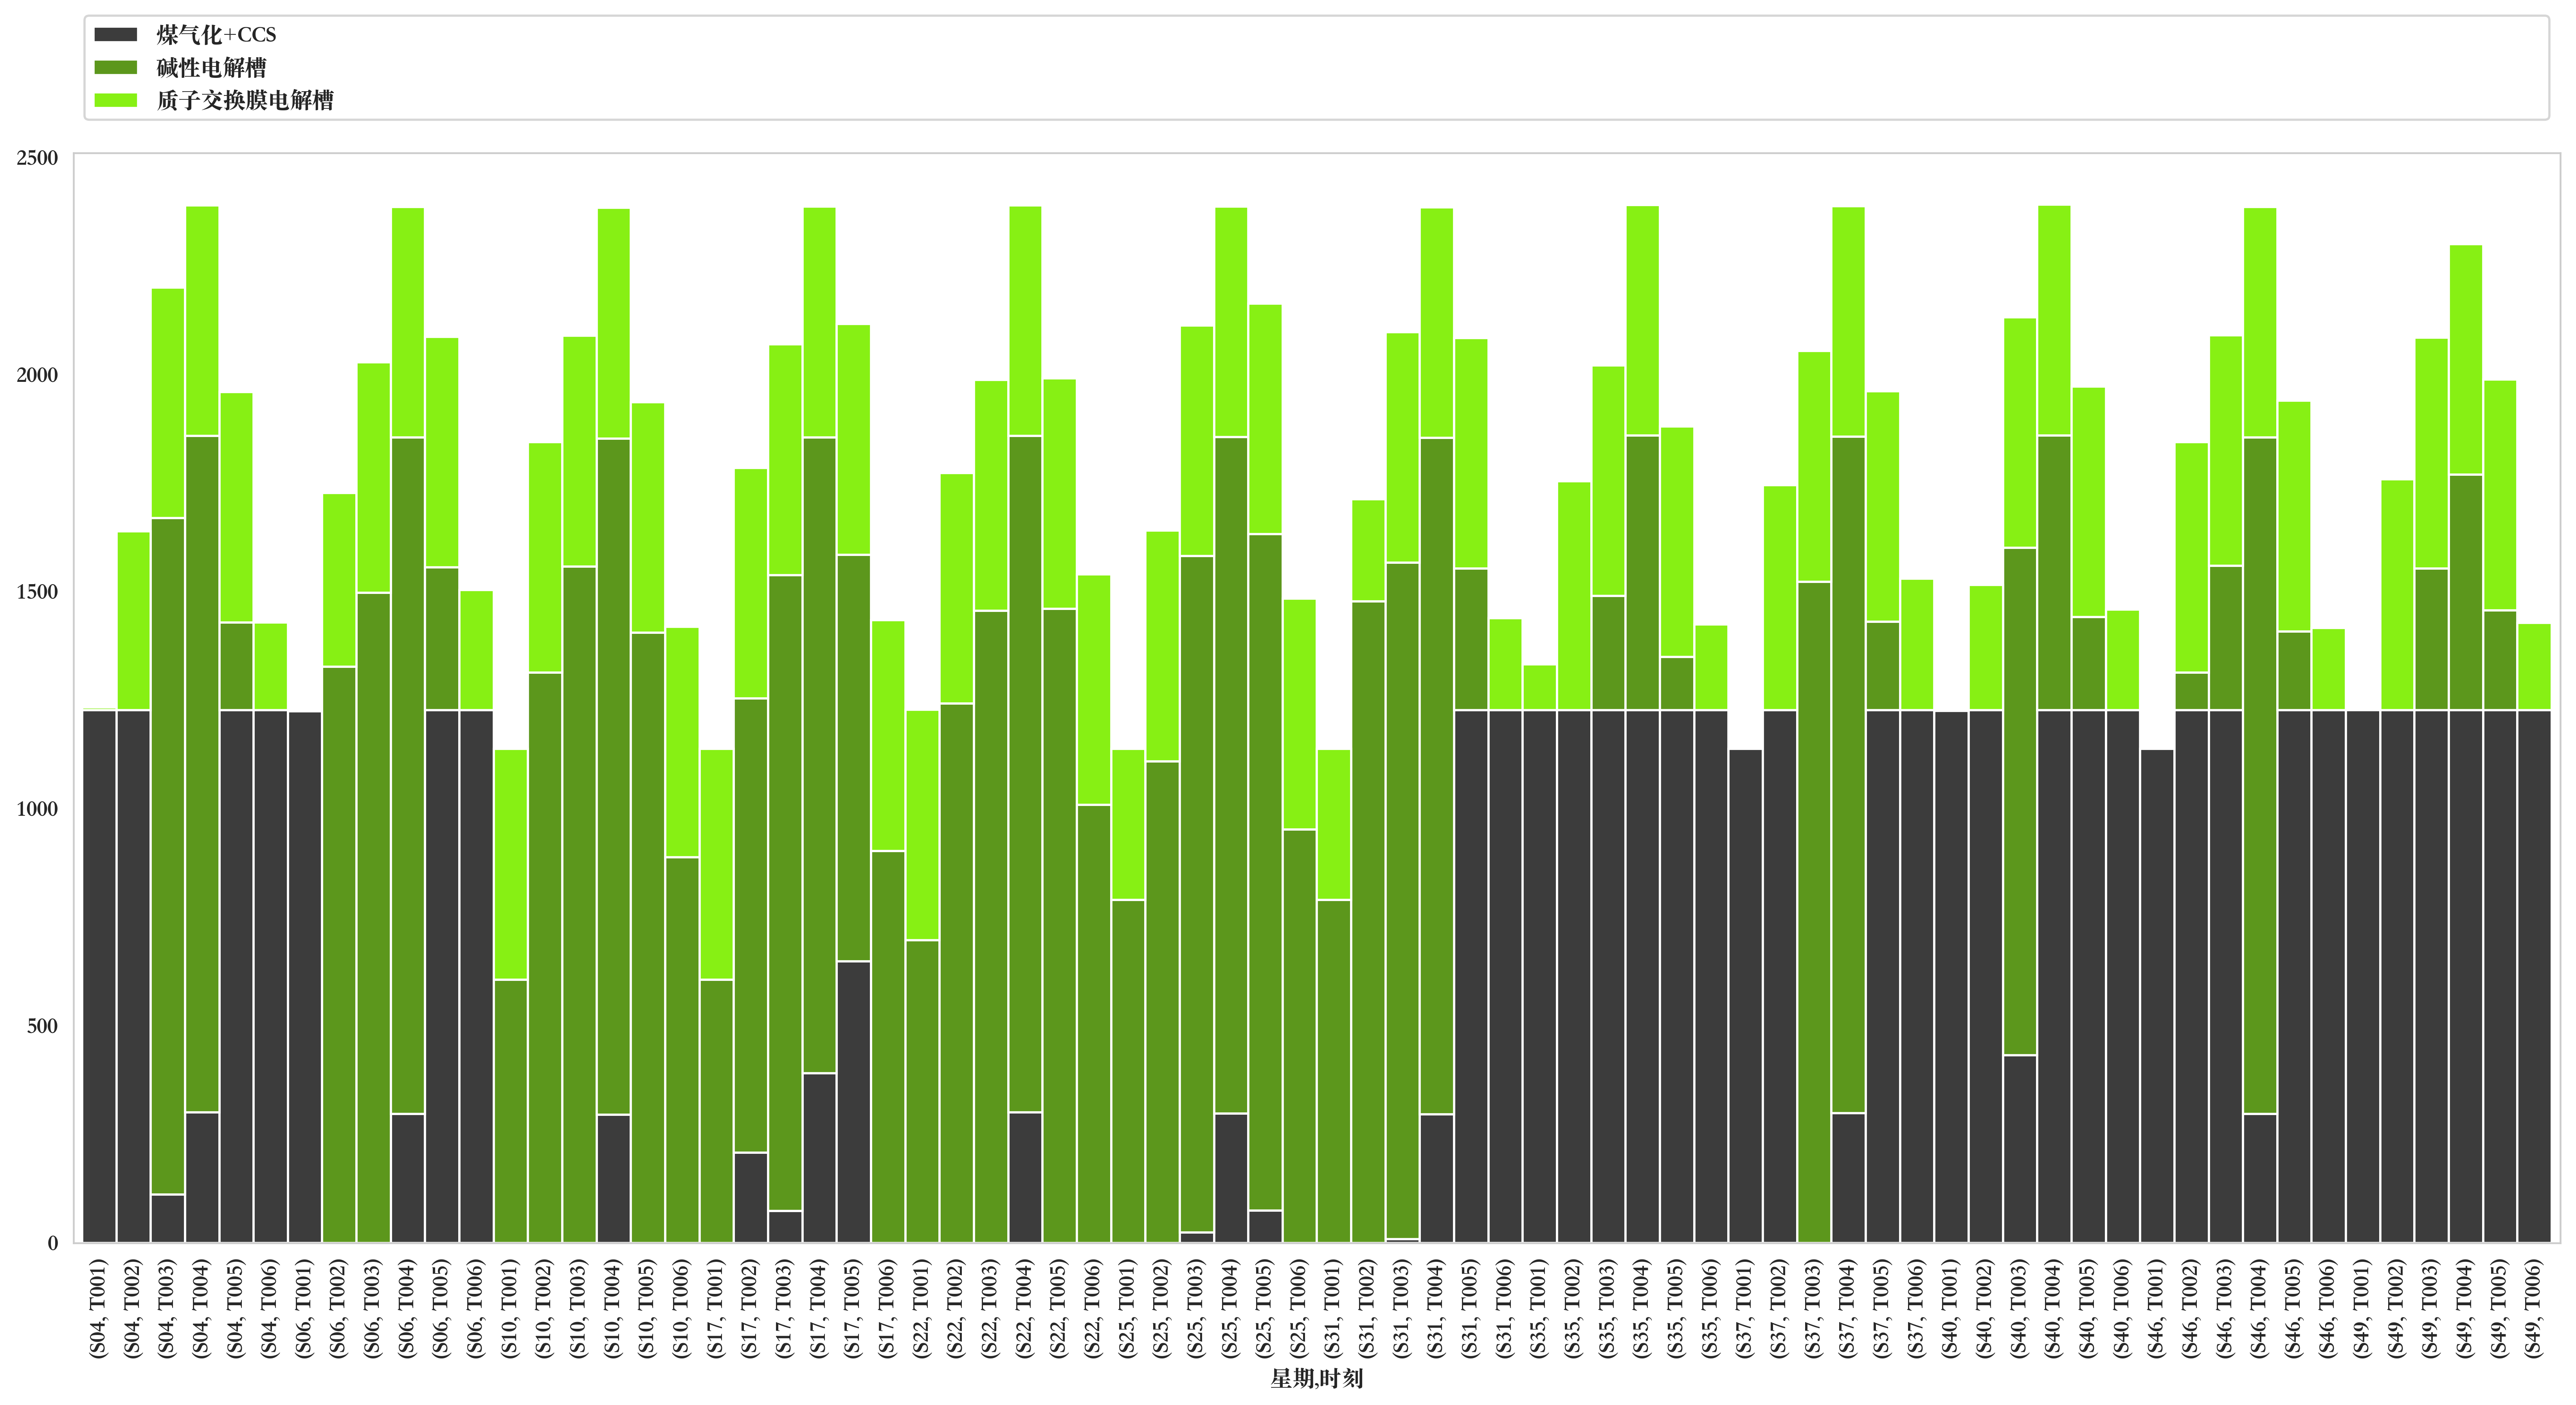

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=410)

data_2_plt = data.aggregated_dataframe.reset_index().drop(axis=1, labels=['年份', '省份']).set_index(['星期', '时刻'])
data_2_plt.plot(kind='bar', width=1.0, stacked=True, ax=ax, figsize=(20, 9),
                                         color=[data.color_scheme.get(x, '#111111') for x in data.aggregated_dataframe.columns])
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand')
# remove the grid
plt.grid(None)

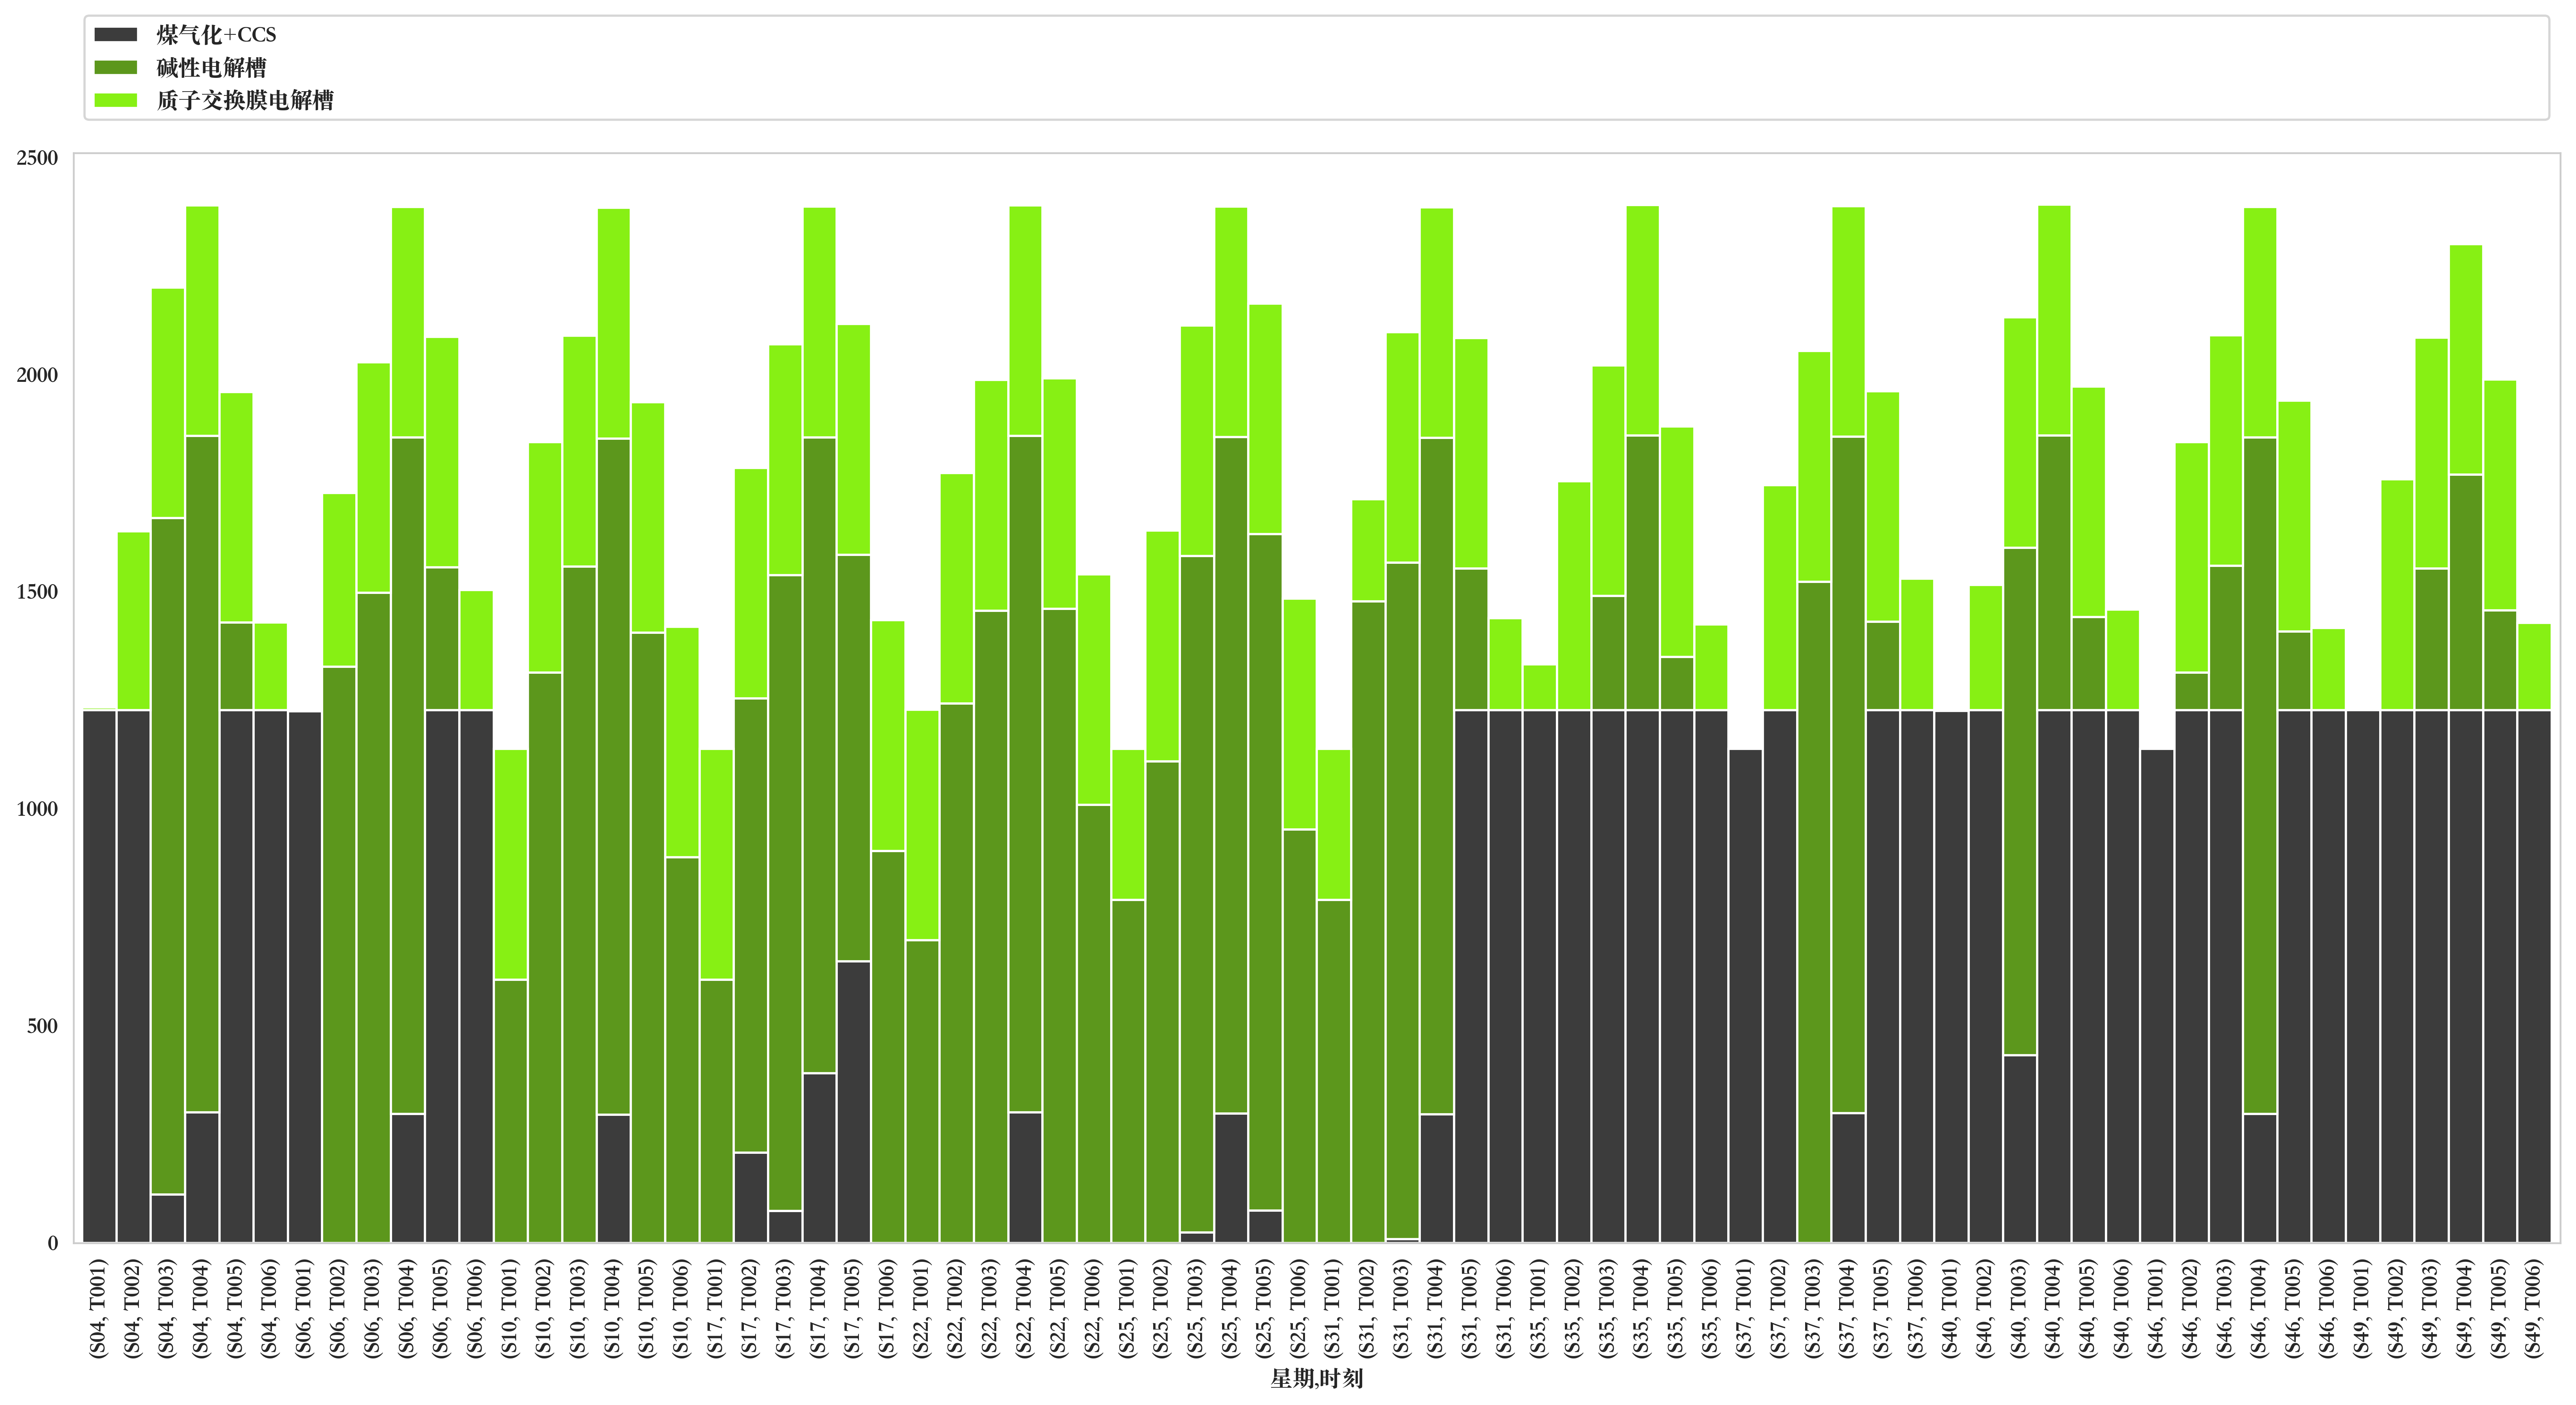

In [9]:
data.bar_plot()